In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

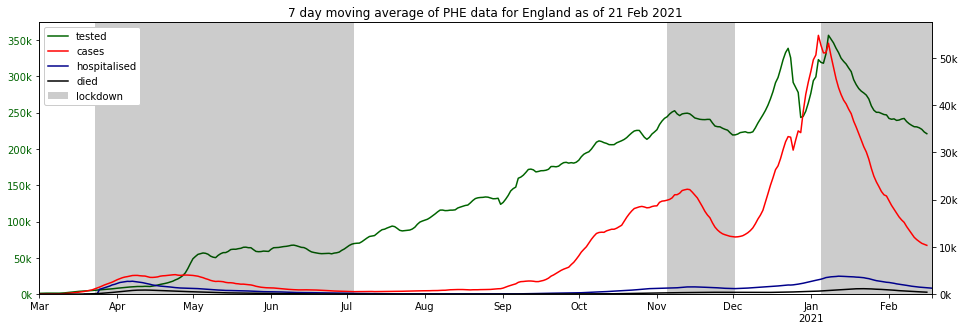

In [10]:
plot_summary(earliest_date='2020-03-01')

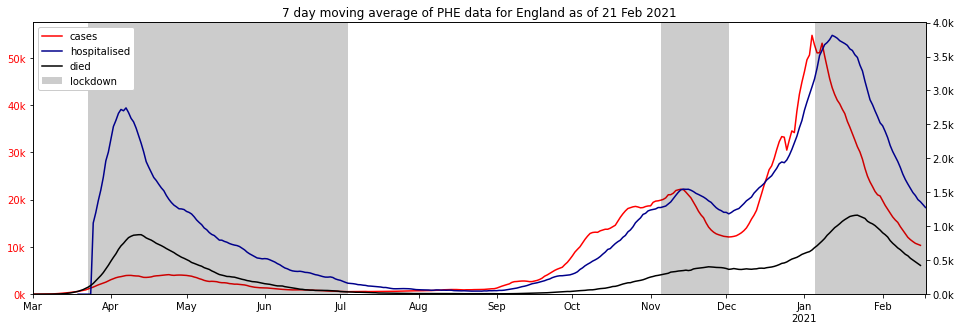

In [11]:
plot_summary(earliest_date='2020-03-01', left_series=(s.new_cases_sum,), 
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,511089.0,14844087.0,14332998.0,56286961,0.908006,25.464153,73.627841
1,Northern Ireland,N92000002,30807.0,446009.0,415202.0,1893667,1.626844,21.925819,76.447337
2,Scotland,S92000003,35479.0,1431942.0,1396463.0,5463300,0.649406,25.560797,73.789797
3,Wales,W92000004,37773.0,860083.0,822310.0,3152879,1.198048,26.081242,72.720710


'partial: 17,582,121'

'full: 615,148'

66796807

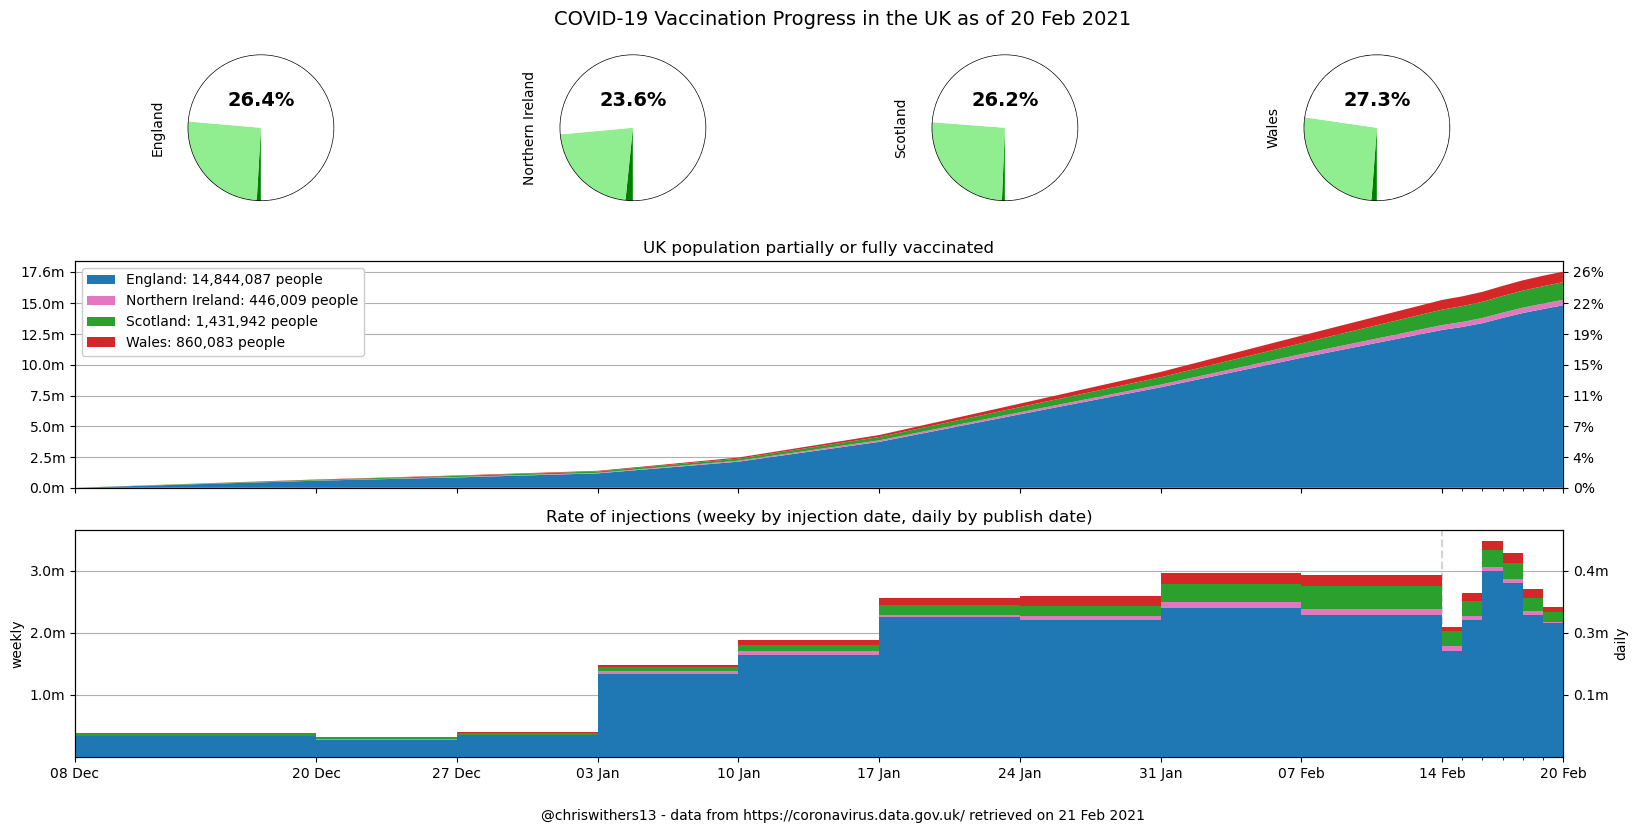

In [12]:
results = vaccination_dashboard()
display(results, f"partial: {results['any'].sum():,.0f}", f"full: {results['full'].sum():,.0f}", results['population'].sum())

In [13]:
vaccination_changes()

,,First Dose (New),Second Dose (Total),Complete (New),First Dose (Total),cumPeopleVaccinatedSecondDoseByPublishDate,Complete (Total)
,,,,,,,
England,20 Feb 21,"+306,109","+2,432","+2,432","+14,844,087","+511,089","+511,089"
Northern Ireland,20 Feb 21,"+3,092",+54,+54,"+446,009","+30,807","+30,807"
Scotland,20 Feb 21,"+19,299","+2,006","+2,006","+1,431,942","+35,479","+35,479"
Wales,20 Feb 21,"+6,179","+5,771","+5,771","+860,083","+37,773","+37,773"


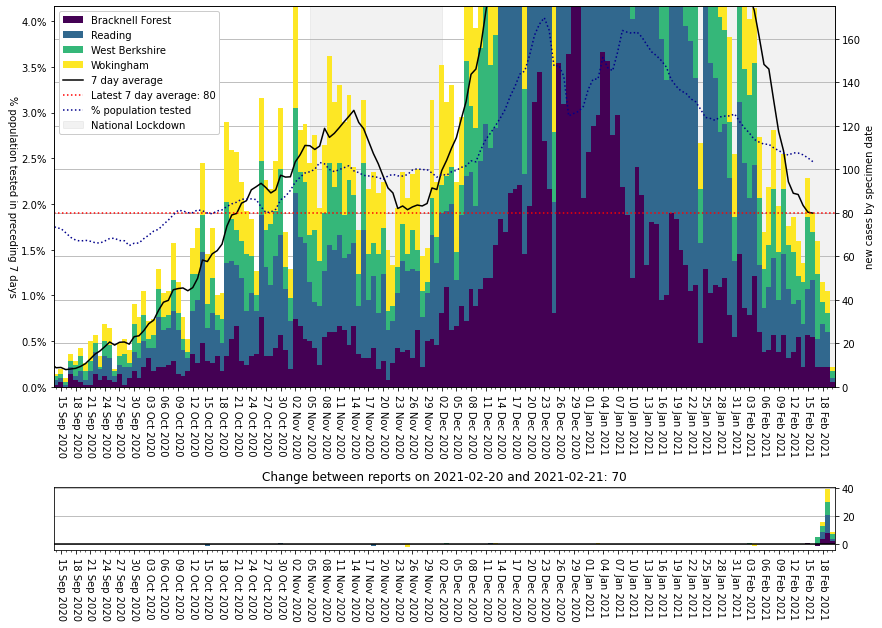

In [14]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=175)

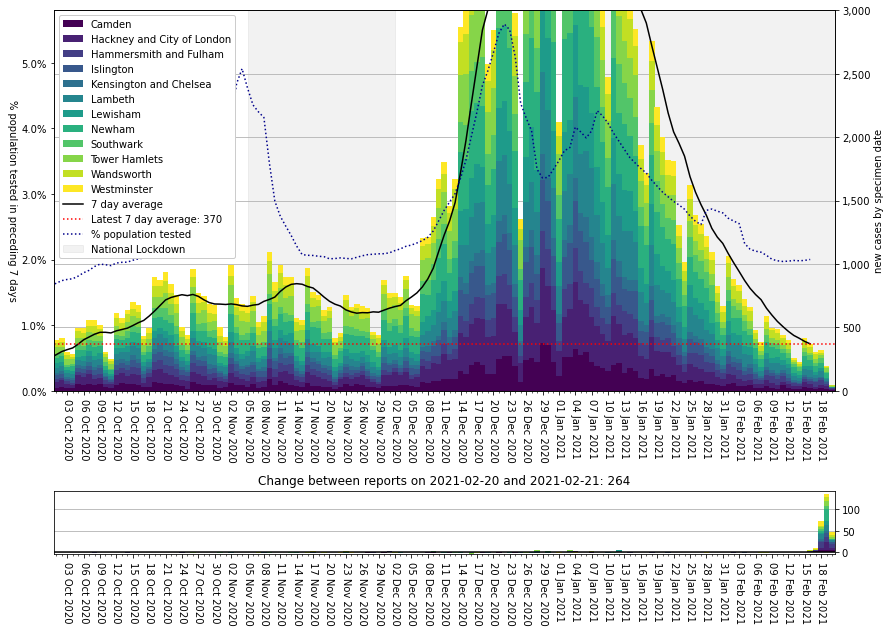

In [15]:
plot_areas(for_date, areas=london_areas, ylim=3_000)

In [16]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [17]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000150,Corby,304.633194,220.0,2021-02-20
E06000031,Peterborough,237.813892,481.0,2021-02-20
E06000017,Rutland,227.915947,91.0,2021-02-20
E08000028,Sandwell,220.733749,725.0,2021-02-20
E06000016,Leicester,219.917340,779.0,2021-02-20
E06000002,Middlesbrough,217.052064,306.0,2021-02-20
E07000236,Redditch,212.289323,181.0,2021-02-20
E07000170,Ashfield,211.854469,271.0,2021-02-20
E07000199,Tamworth,211.223532,162.0,2021-02-20


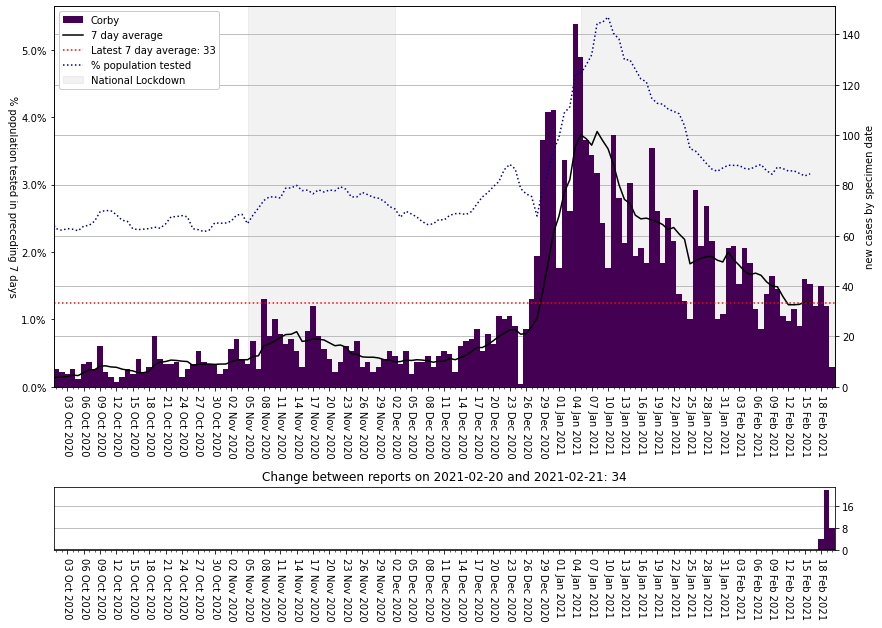

In [18]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [19]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,149.060794,1702.0,2021-02-20
E08000035,Leeds,138.941598,1102.0,2021-02-20
E08000032,Bradford,184.335724,995.0,2021-02-20
E08000003,Manchester,146.330522,809.0,2021-02-20
S12000049,Glasgow City,123.673237,783.0,2021-02-20
E06000016,Leicester,219.917340,779.0,2021-02-20
E08000028,Sandwell,220.733749,725.0,2021-02-20
E08000034,Kirklees,155.757219,685.0,2021-02-20
E08000012,Liverpool,132.719730,661.0,2021-02-20


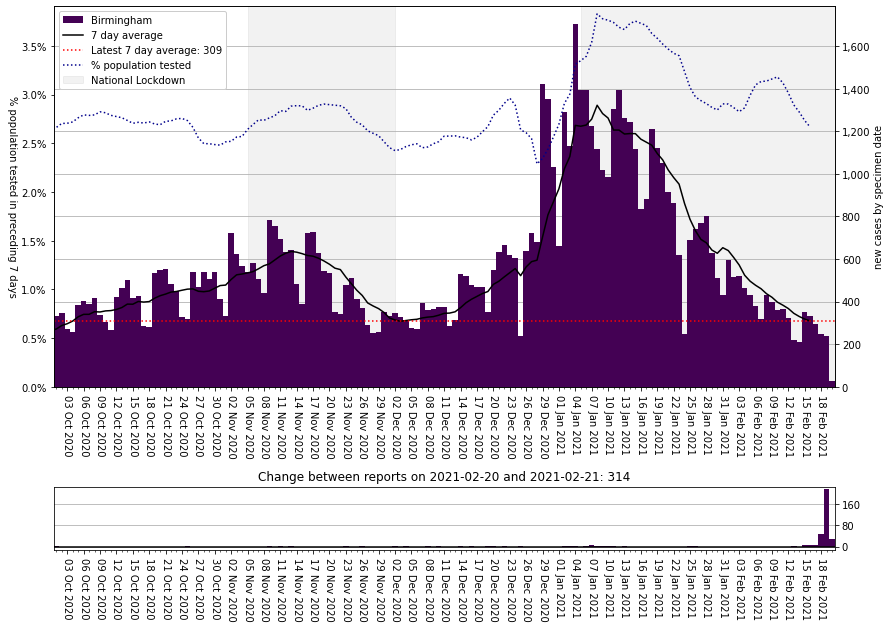

In [20]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [21]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.6
phe_max = 0.35

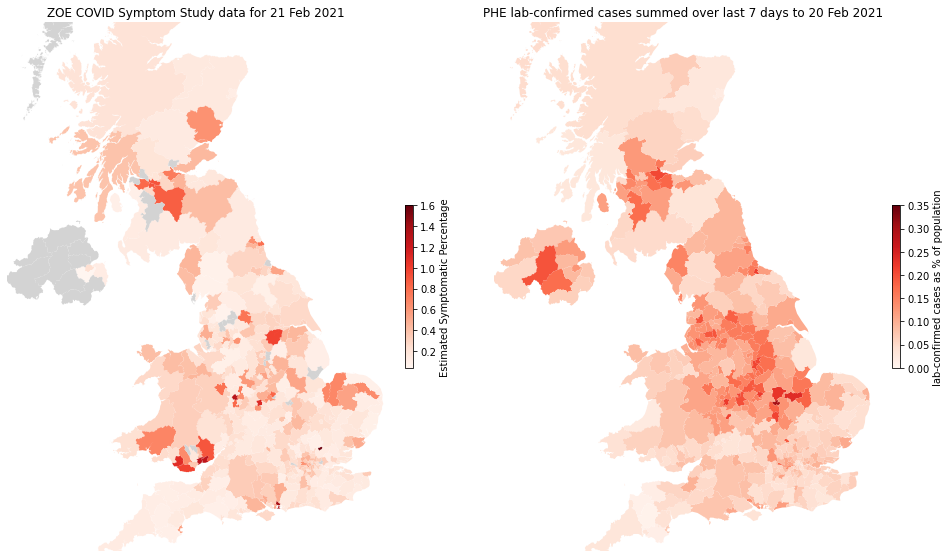

In [22]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [23]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...

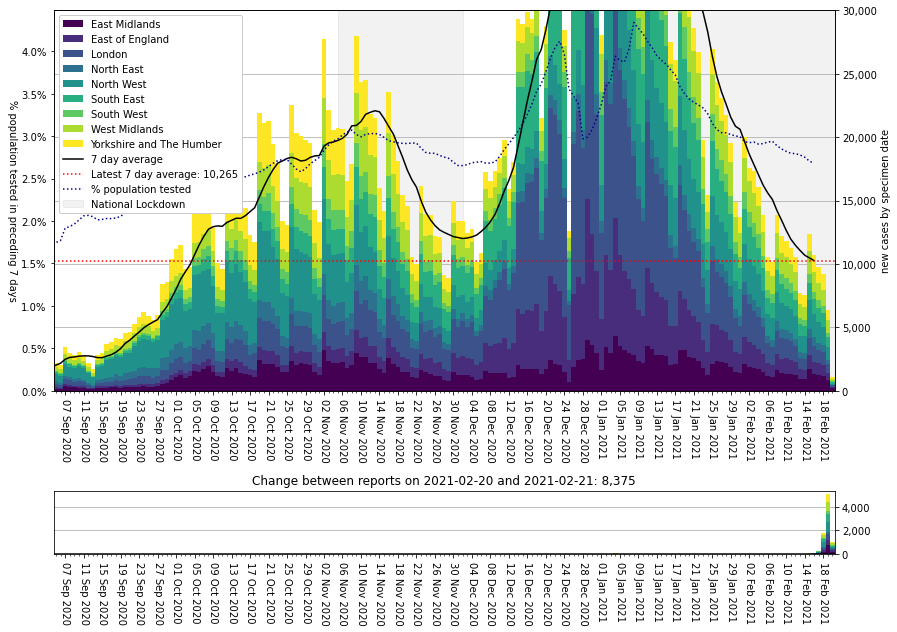

In [24]:
plot_areas(for_date, area_type=region, ylim=30_000, earliest='2020-09-05')

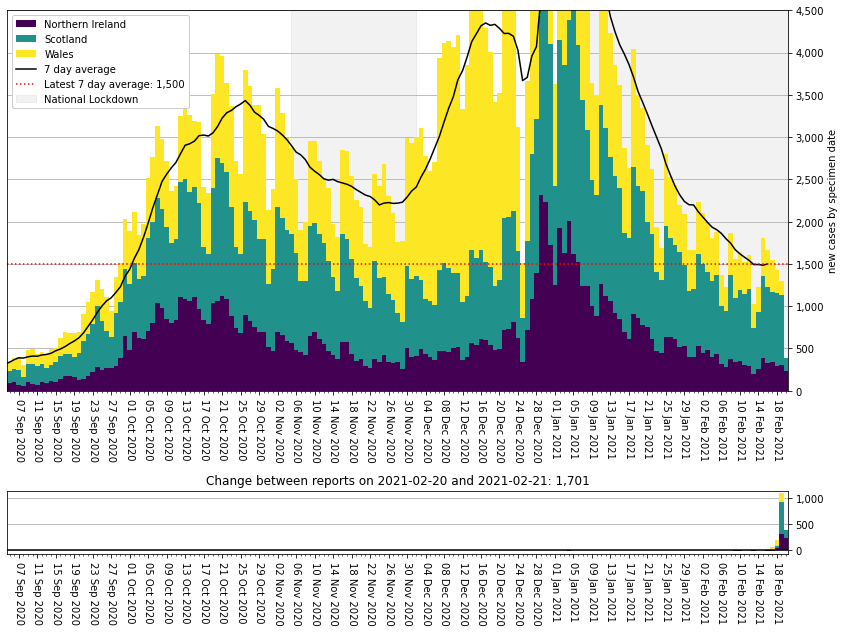

In [25]:
plot_areas(for_date, 'cases_devolved', ylim=4_500, diff_ylims=None, earliest='2020-09-05')